In [1]:
import pandas as pd
df = pd.read_csv('maize_production.csv')

In [2]:
df.head()

,Year,Actual Production
0,1951,1729
1,1952,2076
2,1953,2870
3,1954,3039
4,1955,2975


In [3]:
df = df.rename(columns={'Year': 'year', 'Actual Production': 'Production'})
df.head()

,year,Production
0,1951,1729
1,1952,2076
2,1953,2870
3,1954,3039
4,1955,2975


In [4]:
df['Production'].describe()

,Production
count,70.000000
mean,10182.385714
std,7210.870824
min,1729.000000
25%,5215.500000
50%,7539.500000
75%,12880.750000
max,28766.000000


<Axes: >

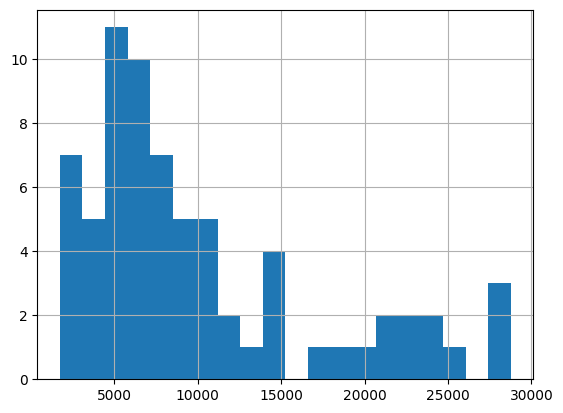

In [6]:
df['Production'].hist(bins=20)

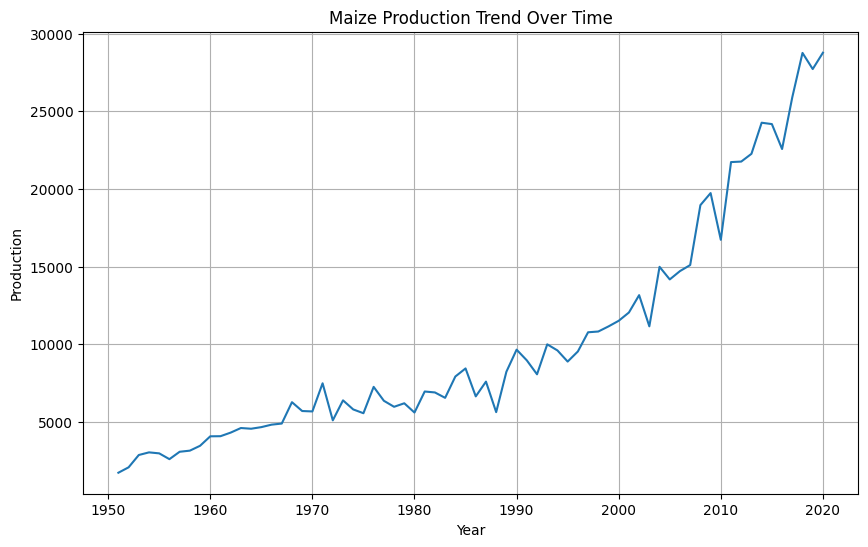

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['Production'])
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Maize Production Trend Over Time')
plt.grid(True)
plt.show()

In [10]:
production_series = df.set_index('year')['Production']
display(production_series.head())

,Production
year,
1951,1729
1952,2076
1953,2870
1954,3039
1955,2975


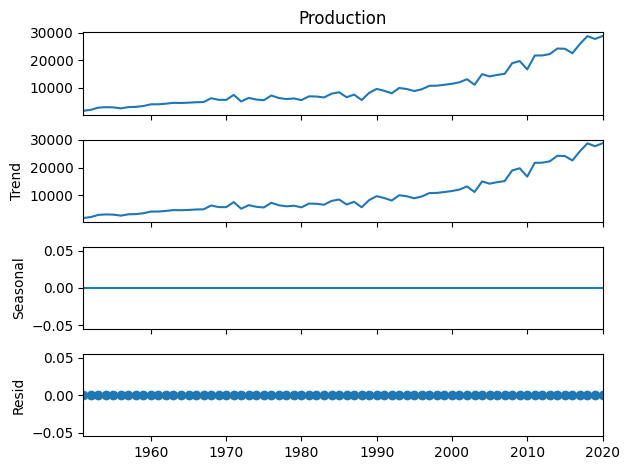

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming production_series is already defined and is a pandas Series with a DatetimeIndex or yearly index
# Since the data is yearly, we can't decompose by seasonality in the traditional sense (like daily or monthly).
# However, we can still decompose into trend and residual.
# If there was clear seasonality, we would specify the frequency.

# For yearly data, we can use an additive model to decompose into trend and residual.
# A simple moving average can be used to estimate the trend.
decomposition = seasonal_decompose(production_series, model='additive', period=1) # period=1 for yearly data

fig = decomposition.plot()
plt.show()

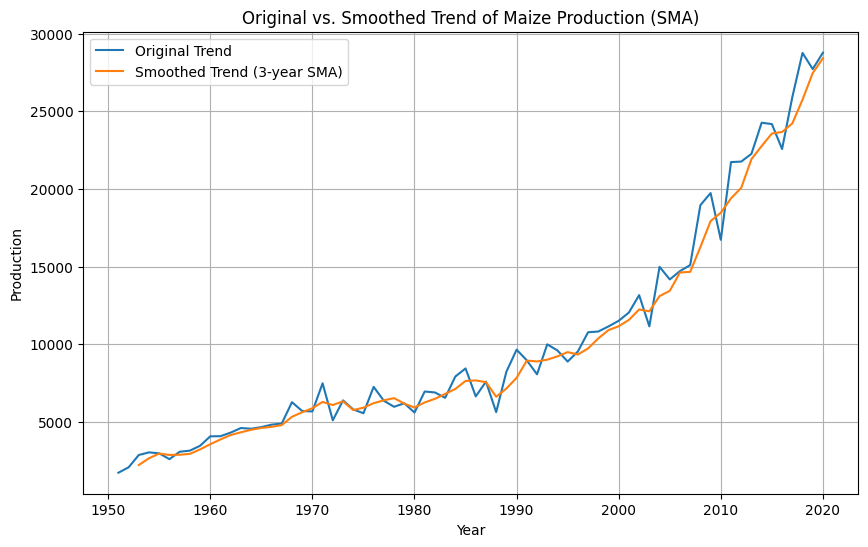

In [15]:
# Get the trend component from the decomposition
trend = decomposition.trend

# Calculate the 3-year simple moving average
smoothed_trend_sma = trend.rolling(window=3).mean()

# Plot the original trend and the smoothed trend with Simple Moving Average
plt.figure(figsize=(10, 6))
plt.plot(trend.index, trend, label='Original Trend')
plt.plot(smoothed_trend_sma.index, smoothed_trend_sma, label='Smoothed Trend (3-year SMA)')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Original vs. Smoothed Trend of Maize Production (SMA)')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Align the trend and smoothed_trend_sma by dropping NaNs from both
aligned_trend = trend.dropna()
aligned_smoothed_trend_sma = smoothed_trend_sma.dropna()

# Ensure both series have the same index after dropping NaNs
# This is crucial for correct alignment before calculating metrics
aligned_trend = aligned_trend[aligned_smoothed_trend_sma.index]


# Calculate MSE for SMA
mse_sma = mean_squared_error(aligned_trend, aligned_smoothed_trend_sma)
print(f'Mean Squared Error (SMA): {mse_sma:.2f}')

# Calculate MAPE for SMA
# Avoid division by zero in MAPE calculation
mape_sma = np.mean(np.abs((aligned_trend - aligned_smoothed_trend_sma) / aligned_trend)) * 100
print(f'Mean Absolute Percentage Error (SMA): {mape_sma:.2f}%')

Mean Squared Error (SMA): 921653.37
Mean Absolute Percentage Error (SMA): 7.04%


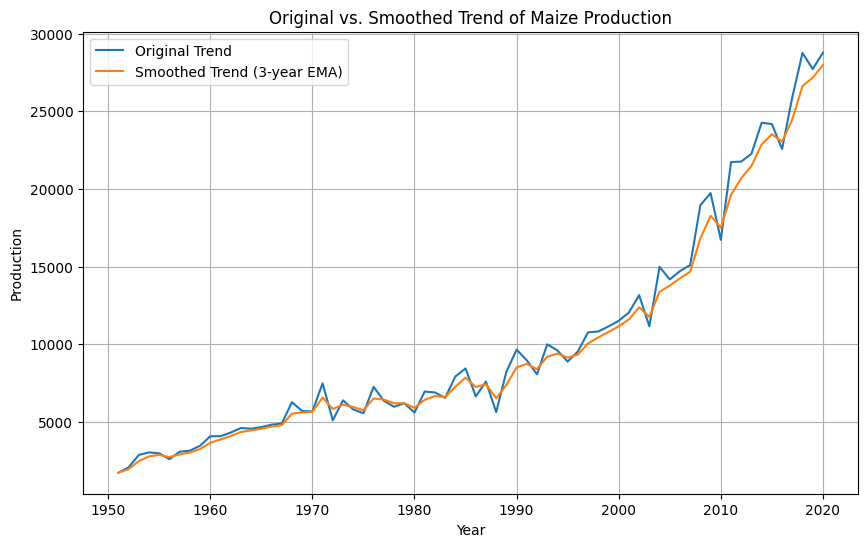

In [12]:
# Get the trend component from the decomposition
trend = decomposition.trend

# Calculate the 3-year exponential moving average
smoothed_trend = trend.ewm(span=3).mean()

# Plot the original trend and the smoothed trend
plt.figure(figsize=(10, 6))
plt.plot(trend.index, trend, label='Original Trend')
plt.plot(smoothed_trend.index, smoothed_trend, label='Smoothed Trend (3-year EMA)')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Original vs. Smoothed Trend of Maize Production')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate MSE
mse = mean_squared_error(trend.dropna(), smoothed_trend.dropna())
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Calculate MAPE
# Avoid division by zero in MAPE calculation
mape = np.mean(np.abs((trend.dropna() - smoothed_trend.dropna()) / trend.dropna())) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Squared Error (MSE): 539721.98
Mean Absolute Percentage Error (MAPE): 5.40%


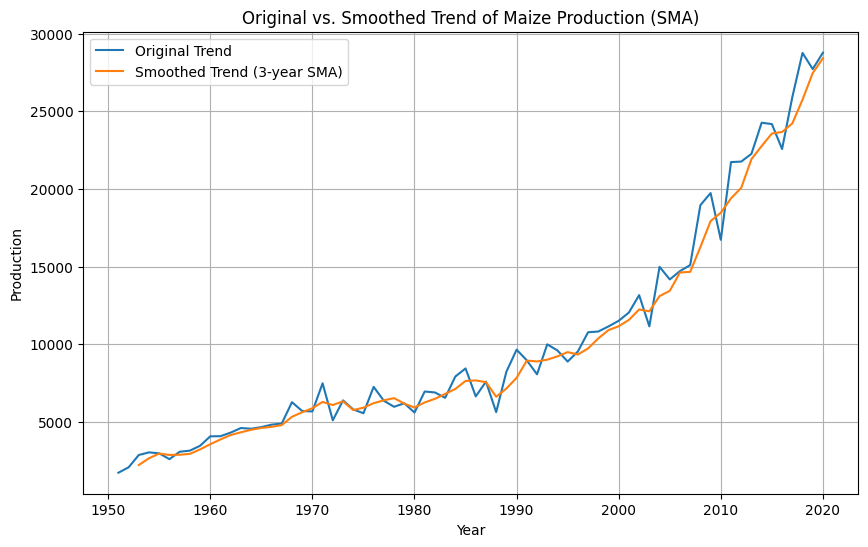

# Task
Analyze the production data by performing the following steps: change the column names to 'year' and 'Production', plot a histogram of 'Production' and increase the number of bins, plot the trend of 'Production', convert 'Production' into a time series, plot the decomposition of the time series, calculate the 3-year exponential moving average and the 3-year simple moving average of the time series, calculate the MSE and MAPE for both moving averages, build a Holt-Winters model for the time series, and calculate the MSE and MAPE for the Holt-Winters model.

## Fit holt-winters model

### Subtask:
Fit a Holt-Winters model to the `production_series` data. Since the data is yearly, we will likely use a model without seasonality, or with a very small period if we believe there's a short-term cycle.


**Reasoning**:
Import the necessary class and instantiate and fit the Holt-Winters model to the time series data.



In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Instantiate the Holt-Winters model
# Using seasonal=None for yearly data assuming no strong yearly seasonality pattern
# Setting trend='add' to model the observed additive trend
holt_winters_model = ExponentialSmoothing(production_series, seasonal=None, trend='add')

# Fit the model to the data
fitted_model = holt_winters_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


## Generate in-sample predictions

### Subtask:
Obtain the fitted values (predictions) from the Holt-Winters model for the same period as the original data.


**Reasoning**:
Access the fitted values from the Holt-Winters model and store them in a variable.



In [19]:
# Access the fitted values from the fitted_model object
holt_winters_predictions = fitted_model.fittedvalues

# Display the first few fitted values to verify
display(holt_winters_predictions.head())

,0
year,
1951,2039.914990
1952,2135.885352
1953,2295.506140
1954,2669.319199
1955,3014.777254


## Calculate mse and mape

### Subtask:
Calculate the Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE) between the original `production_series` and the in-sample predictions from the Holt-Winters model.


**Reasoning**:
Calculate the MSE and MAPE for the Holt-Winters model predictions.



In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate MSE for Holt-Winters
mse_holt_winters = mean_squared_error(production_series, holt_winters_predictions)
print(f'Mean Squared Error (Holt-Winters): {mse_holt_winters:.2f}')

# Calculate MAPE for Holt-Winters
# Avoid division by zero in MAPE calculation
mape_holt_winters = np.mean(np.abs((production_series - holt_winters_predictions) / production_series)) * 100
print(f'Mean Absolute Percentage Error (Holt-Winters): {mape_holt_winters:.2f}%')

Mean Squared Error (Holt-Winters): 1227249.87
Mean Absolute Percentage Error (Holt-Winters): 8.92%


## Display results

### Subtask:
Print the calculated MSE and MAPE values for the Holt-Winters model.


**Reasoning**:
Print the calculated MSE and MAPE values for the Holt-Winters model as requested by the instructions.



In [21]:
print(f'Mean Squared Error (Holt-Winters): {mse_holt_winters:.2f}')
print(f'Mean Absolute Percentage Error (Holt-Winters): {mape_holt_winters:.2f}%')

Mean Squared Error (Holt-Winters): 1227249.87
Mean Absolute Percentage Error (Holt-Winters): 8.92%


## Summary:

### Data Analysis Key Findings

*   The Mean Squared Error (MSE) for the Holt-Winters model's in-sample predictions is 1,227,249.87.
*   The Mean Absolute Percentage Error (MAPE) for the Holt-Winters model's in-sample predictions is 8.92%.

### Insights or Next Steps

*   Compare the MSE and MAPE of the Holt-Winters model to the moving average models to evaluate which model provides a better fit to the historical data.
*   Consider using the fitted Holt-Winters model for forecasting future production values and evaluate its performance on out-of-sample data.


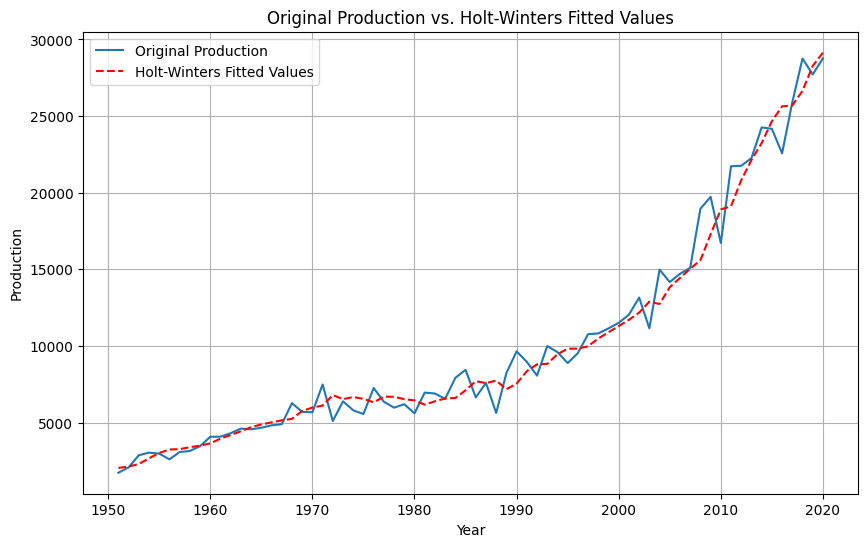

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(production_series.index, production_series, label='Original Production')
plt.plot(holt_winters_predictions.index, holt_winters_predictions, label='Holt-Winters Fitted Values', color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Original Production vs. Holt-Winters Fitted Values')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

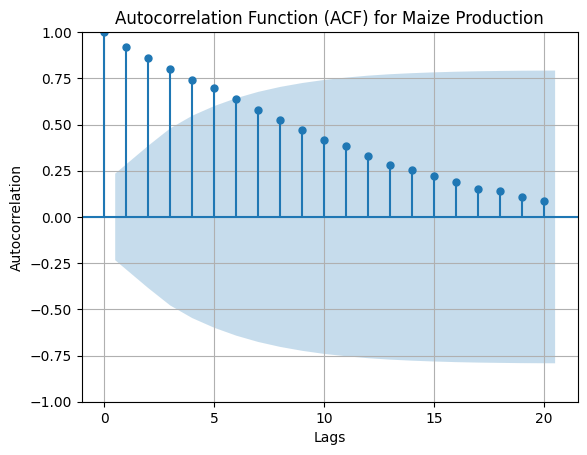

<Figure size 1200x600 with 0 Axes>

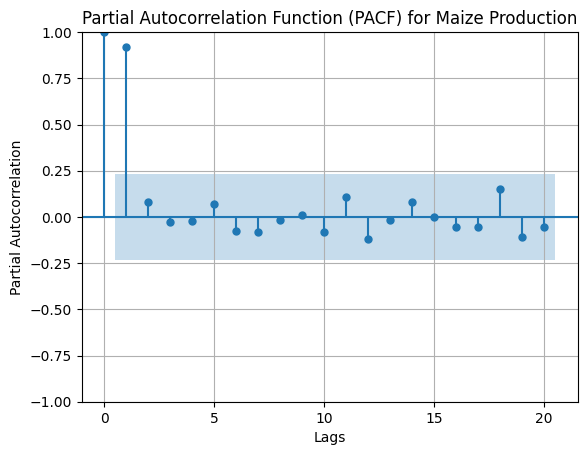

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(production_series, lags=20) # You can adjust the number of lags as needed
plt.title('Autocorrelation Function (ACF) for Maize Production')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(production_series, lags=20) # You can adjust the number of lags as needed
plt.title('Partial Autocorrelation Function (PACF) for Maize Production')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

# Task
Analyze the production data by performing the following steps:
1. Rename the columns to 'year' and 'Production'.
2. Plot a histogram of the 'Production' column and increase the number of bins.
3. Plot the trend of the 'Production' data.
4. Convert the 'Production' data into a time series.
5. Plot the decomposition of the time series data.
6. Apply a 3-year exponential moving average to smoothen the trend and calculate the MSE and MAPE.
7. Apply a 3-year simple moving average to smoothen the trend and calculate the MSE and MAPE.
8. Build a Holt-Winters model for the data, find the MSE and MAPE, and plot the trend with seasonality.
9. Plot the ACF and PACF for the 'Production' data.
10. Build an auto ARIMA model for the 'Production' data, add the chart, and calculate the MSE and MAPE.
11. Build an ARIMA(6,1,2) model for the 'Production' data, add the chart, and calculate the MSE and MAPE.

## Fit arima model

### Subtask:
Fit an ARIMA(6,1,2) model to the `production_series` data.


**Reasoning**:
Import the ARIMA class, instantiate the model with the specified order, and fit it to the data.



In [24]:
from statsmodels.tsa.arima.model import ARIMA

# Instantiate the ARIMA model with order (6, 1, 2)
arima_model = ARIMA(production_series, order=(6, 1, 2))

# Fit the model to the data
arima_fitted_model = arima_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

## Generate in-sample predictions

### Subtask:
Obtain the fitted values (predictions) from the ARIMA model for the same period as the original data.


**Reasoning**:
Access the fitted values from the ARIMA model and store them in a variable, then display the first few values.



In [25]:
# Access the fitted values from the arima_fitted_model object
arima_predictions = arima_fitted_model.fittedvalues

# Display the first few fitted values to verify
display(arima_predictions.head())

,0
year,
1951,0.000000
1952,1413.270793
1953,1862.594627
1954,3103.145503
1955,3572.881644


## Plot original vs. fitted values

### Subtask:
Plot the original `production_series` and the ARIMA fitted values to visualize the model's performance.


**Reasoning**:
I will now plot the original `production_series` and the `arima_predictions` on the same graph to visually assess the performance of the ARIMA model. This will involve creating a plot, adding both series with distinct styles and labels, setting appropriate titles and labels for the axes, and including a legend and grid for clarity before displaying the final visualization.



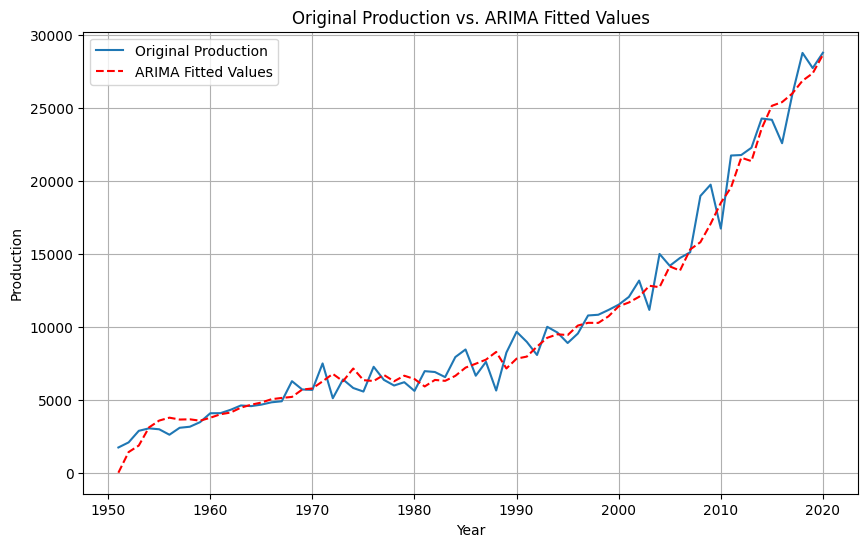

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(production_series.index, production_series, label='Original Production')
plt.plot(arima_predictions.index, arima_predictions, label='ARIMA Fitted Values', color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Original Production vs. ARIMA Fitted Values')
plt.legend()
plt.grid(True)
plt.show()

## Calculate mse and mape

### Subtask:
Calculate the Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE) between the original `production_series` and the ARIMA in-sample predictions.


**Reasoning**:
Calculate the MSE and MAPE for the ARIMA model predictions.



In [27]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate MSE for ARIMA
mse_arima = mean_squared_error(production_series, arima_predictions)
print(f'Mean Squared Error (ARIMA): {mse_arima:.2f}')

# Calculate MAPE for ARIMA
# Avoid division by zero in MAPE calculation
mape_arima = np.mean(np.abs((production_series - arima_predictions) / production_series)) * 100
print(f'Mean Absolute Percentage Error (ARIMA): {mape_arima:.2f}%')

Mean Squared Error (ARIMA): 1232857.69
Mean Absolute Percentage Error (ARIMA): 11.33%


## Display results

### Subtask:
Print the calculated MSE and MAPE values for the ARIMA model.


**Reasoning**:
Print the calculated MSE and MAPE values for the ARIMA model as requested by the instructions.



In [28]:
print(f'Mean Squared Error (ARIMA): {mse_arima:.2f}')
print(f'Mean Absolute Percentage Error (ARIMA): {mape_arima:.2f}%')

Mean Squared Error (ARIMA): 1232857.69
Mean Absolute Percentage Error (ARIMA): 11.33%


## Summary:

### Data Analysis Key Findings

*   An ARIMA(6,1,2) model was fitted to the production data, although a convergence warning was noted during the fitting process.
*   The ARIMA model's in-sample predictions were generated and visualized against the original production data, showing a general alignment with the trend.
*   The Mean Squared Error (MSE) for the ARIMA model's in-sample predictions is approximately 1,232,857.69.
*   The Mean Absolute Percentage Error (MAPE) for the ARIMA model's in-sample predictions is approximately 11.33%.

### Insights or Next Steps

*   Compare the MSE and MAPE values of the ARIMA(6,1,2) model with those from other models (exponential moving average, simple moving average, Holt-Winters, auto ARIMA) to determine the best-performing model for this dataset.
*   Investigate the cause of the convergence warning during the ARIMA model fitting and consider alternative model orders or parameters if necessary.


Exponential Moving Average Forecast for the next 3 years:


,0
2021,27964.808359
2022,27964.808359
2023,27964.808359


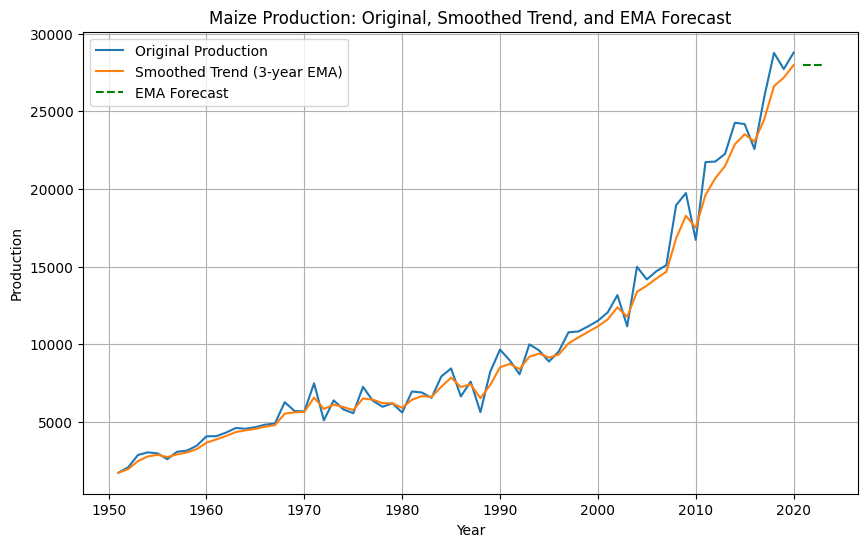

In [29]:
# Get the last value of the smoothed trend (3-year EMA)
last_ema_value = smoothed_trend.iloc[-1]

# Get the last year from the index
last_year = smoothed_trend.index[-1]

# Create an index for the next three years
future_years = range(last_year + 1, last_year + 4)

# Create a forecast series by extending the last EMA value
ema_forecast = pd.Series([last_ema_value] * 3, index=future_years)

# Display the forecast
print("Exponential Moving Average Forecast for the next 3 years:")
display(ema_forecast)

# Optionally, plot the original data, smoothed trend, and forecast
plt.figure(figsize=(10, 6))
plt.plot(production_series.index, production_series, label='Original Production')
plt.plot(smoothed_trend.index, smoothed_trend, label='Smoothed Trend (3-year EMA)')
plt.plot(ema_forecast.index, ema_forecast, label='EMA Forecast', color='green', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Maize Production: Original, Smoothed Trend, and EMA Forecast')
plt.legend()
plt.grid(True)
plt.show()